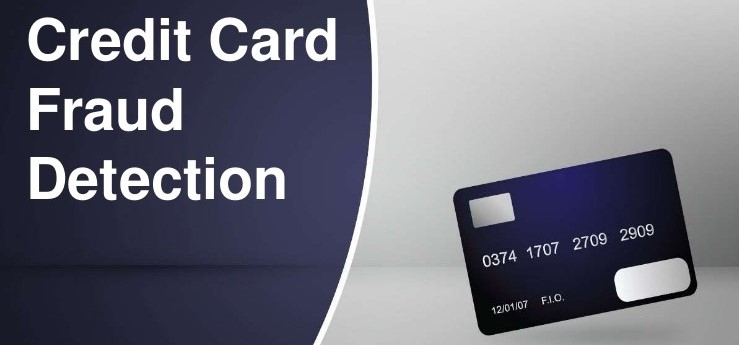

### Business Problem Overview


The problem statement chosen for this project is to predict fraudulent credit card transactions with the help of machine learning models.
In this project, we will analyze customer-level data which has been collected and analyzed during a research collaboration of Worldline and the Machine Learning Group.
The dataset is taken from the Kaggle Website website and it has a total of 2,84,807 transactions, out of which 492 are fraudulent. Since the dataset is highly imbalanced, it needs to be handled before model building.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score

### Importing Dataset

In [4]:
df = pd.read_csv("creditcard.csv") #importing dataset
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


### Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df[df.duplicated()] #identifying duplicates

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


In [7]:
df.drop_duplicates() #dropping duplicates

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


E:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, '284315'), Text(0, 0, '492')]

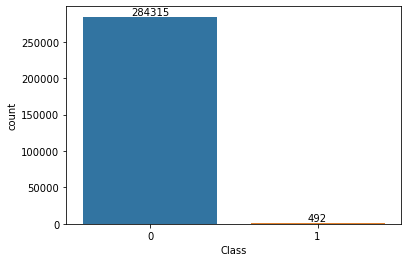

In [8]:
ax = sns.countplot(df['Class'])
abs_values = df['Class'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)

### SMOTE Resampling

In [9]:
# Resampling the minority class.

sm = SMOTE(sampling_strategy='minority', random_state=42)

# Fit the model to generate the data.

oversampled_X, oversampled_Y = sm.fit_resample(df.drop('Class', axis=1), df['Class'])
oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

In [10]:
oversampled[oversampled.duplicated()]

,Class,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
33,0,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,...,-0.290348,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14
35,0,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,...,-0.283264,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77
113,0,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,...,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18
114,0,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,...,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18
115,0,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,...,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568384,1,93879.0,-12.833631,7.508790,-20.491952,7.465780,-11.575304,-5.140999,-14.020564,8.332120,...,-1.378923,2.966842,0.615344,-0.766495,0.431261,-0.104975,-0.010091,-2.400811,-0.720557,104.03
568394,1,68207.0,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,...,-3.493050,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1.00
568444,1,68207.0,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,...,-3.493050,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1.00
568476,1,148053.0,1.261324,2.726800,-5.435019,5.342759,1.447043,-1.442584,-0.898702,0.123062,...,0.313332,0.209086,-0.425938,-0.154440,-0.018820,0.632234,0.192922,0.468181,0.280486,1.59


E:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, '284315'), Text(0, 0, '284315')]

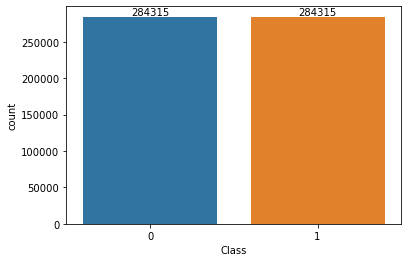

In [11]:
ax = sns.countplot(oversampled['Class'])
abs_values = oversampled['Class'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)

E:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, '283253'), Text(0, 0, '276845')]

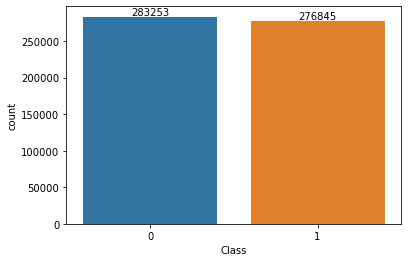

In [12]:
oversampled1 = oversampled.drop_duplicates() #dropping duplicates 
ax = sns.countplot(oversampled1['Class'])
abs_values = oversampled1['Class'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)

In [13]:
oversampled1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 560098 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Class   560098 non-null  int64  
 1   Time    560098 non-null  float64
 2   V1      560098 non-null  float64
 3   V2      560098 non-null  float64
 4   V3      560098 non-null  float64
 5   V4      560098 non-null  float64
 6   V5      560098 non-null  float64
 7   V6      560098 non-null  float64
 8   V7      560098 non-null  float64
 9   V8      560098 non-null  float64
 10  V9      560098 non-null  float64
 11  V10     560098 non-null  float64
 12  V11     560098 non-null  float64
 13  V12     560098 non-null  float64
 14  V13     560098 non-null  float64
 15  V14     560098 non-null  float64
 16  V15     560098 non-null  float64
 17  V16     560098 non-null  float64
 18  V17     560098 non-null  float64
 19  V18     560098 non-null  float64
 20  V19     560098 non-null  float64
 21  V20     56

In [14]:
oversampled1.describe()

,Class,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,560098.000000,560098.000000,560098.000000,560098.000000,560098.000000,560098.000000,560098.000000,560098.000000,560098.000000,560098.000000,...,560098.000000,560098.000000,560098.000000,560098.000000,560098.000000,560098.000000,560098.000000,560098.000000,560098.000000,560098.000000
mean,0.494280,87876.377719,-2.328376,1.797183,-3.503403,2.287273,-1.543836,-0.744916,-2.732015,0.512117,...,0.202659,0.247279,0.037570,-0.037102,-0.052925,0.025704,0.029411,0.094162,0.040039,96.247679
std,0.499968,48394.562465,5.266406,3.467169,5.985612,3.129502,4.044281,1.627664,5.400183,3.950522,...,0.987226,1.882324,0.924143,0.928390,0.540272,0.614270,0.444571,0.872867,0.406544,221.469325
min,0.000000,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,...,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000
25%,0.000000,45553.250000,-2.906297,-0.107936,-5.080353,-0.075206,-1.730067,-1.546873,-3.103819,-0.189118,...,-0.183807,-0.159307,-0.489766,-0.223943,-0.379639,-0.303778,-0.267864,-0.066672,-0.056311,3.660000
50%,0.000000,80190.000000,-0.791340,0.992307,-1.496349,1.432918,-0.422489,-0.693630,-0.724412,0.172887,...,0.041928,0.156488,0.025311,-0.029177,-0.006423,0.041656,-0.001698,0.057253,0.036197,25.721173
75%,1.000000,134903.993101,0.854164,2.796865,0.281865,4.303349,0.438748,0.011154,0.196298,0.848882,...,0.434661,0.626735,0.525712,0.180377,0.340818,0.368748,0.310050,0.424081,0.208891,99.990000
max,1.000000,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,...,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000


In [15]:
oversampled1.corr()

,Class,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,1.000000,-0.145445,-0.449788,0.527176,-0.594212,0.742660,-0.387819,-0.463704,-0.513690,0.131751,...,0.208145,0.133499,0.041297,-0.040816,-0.099822,0.042821,0.066768,0.107485,0.098581,0.035780
Time,-0.145445,1.000000,0.267674,-0.245962,0.172886,-0.224331,0.313508,0.137580,0.248193,-0.205758,...,-0.064821,-0.069252,0.148501,0.079107,-0.000337,-0.225531,-0.054979,-0.164765,0.006720,0.016572
V1,-0.449788,0.267674,1.000000,-0.799844,0.882450,-0.623278,0.871466,0.410106,0.877992,-0.288695,...,-0.346240,0.076519,-0.062334,0.029682,-0.067944,-0.136782,0.043500,0.093193,0.151640,-0.049367
V2,0.527176,-0.245962,-0.799844,1.000000,-0.865816,0.694099,-0.804354,-0.401103,-0.842588,0.202286,...,0.388454,-0.071438,0.067467,0.040441,0.005944,0.140938,0.005804,-0.084866,-0.005475,-0.235444
V3,-0.594212,0.172886,0.882450,-0.865816,1.000000,-0.778060,0.854746,0.531093,0.892862,-0.335961,...,-0.372652,0.039345,-0.062716,0.024450,0.012781,-0.130872,-0.027101,0.009267,0.102418,-0.015115
V4,0.742660,-0.224331,-0.623278,0.694099,-0.778060,1.000000,-0.584605,-0.485841,-0.735399,0.174945,...,0.306207,-0.014425,0.141034,0.005358,-0.083207,-0.011061,0.143849,0.029587,-0.061644,-0.000681
V5,-0.387819,0.313508,0.871466,-0.804354,0.854746,-0.584605,1.000000,0.372643,0.848477,-0.375377,...,-0.325958,0.033900,-0.063415,-0.013711,-0.125549,-0.142379,0.048390,0.091264,0.138361,-0.111565
V6,-0.463704,0.137580,0.410106,-0.401103,0.531093,-0.485841,0.372643,1.000000,0.388571,-0.541702,...,-0.070633,-0.220579,0.160134,0.247163,-0.005257,-0.173210,-0.045600,-0.209079,-0.070075,0.176688
V7,-0.513690,0.248193,0.877992,-0.842588,0.892862,-0.735399,0.848477,0.388571,1.000000,-0.108631,...,-0.439055,0.163195,-0.209540,-0.018277,-0.045360,0.008201,0.005526,0.160525,0.150057,0.118321
V8,0.131751,-0.205758,-0.288695,0.202286,-0.335961,0.174945,-0.375377,-0.541702,-0.108631,1.000000,...,-0.151905,0.378461,-0.348974,-0.336384,0.067017,0.331665,0.027959,0.380006,0.059306,0.000578


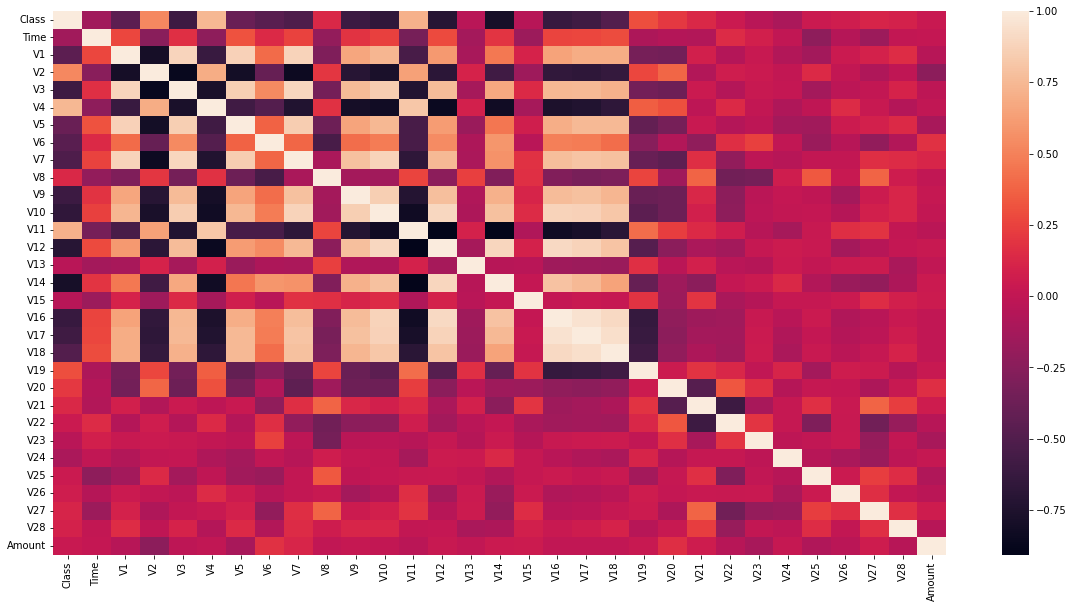

In [16]:
plt.figure(figsize=(20,10))
sns.heatmap(oversampled1.corr())
plt.show()

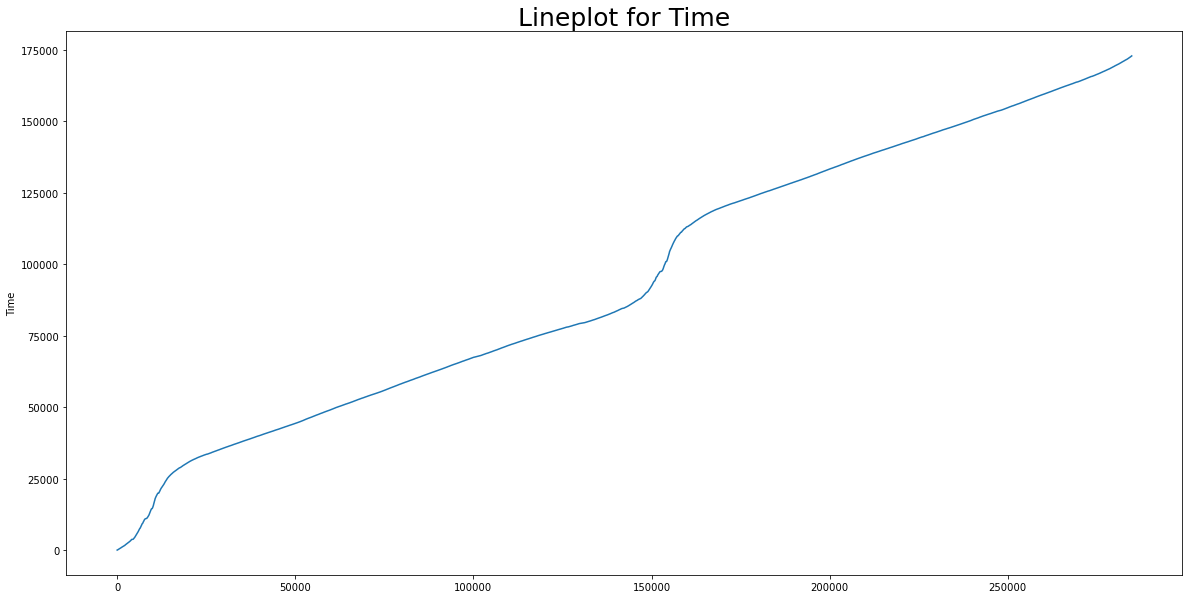

In [17]:
plt.figure(figsize=(20,10))
plt.title('Lineplot for Time',fontsize= 25)
sns.lineplot(data=df['Time'])
plt.show()

### Feature Engineering

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
# Dividing our data into input and output variables 
X= oversampled1.iloc[:,1:31]
Y= oversampled1.iloc[:,0]

In [20]:
Y.value_counts()

0    283253
1    276845
Name: Class, dtype: int64

### Splitting Dataset into Train and Test

In [21]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size = 0.25,random_state=0)

### Logistic Regression

In [22]:
#Logistic regression and fit the model on train dat
model = LogisticRegression(max_iter = 500)
model.fit(xtrain,ytrain)
pred = model.predict(xtest)

In [23]:
from sklearn.metrics import classification_report
print(classification_report(pred,ytest))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97     71872
           1       0.96      0.98      0.97     68153

    accuracy                           0.97    140025
   macro avg       0.97      0.97      0.97    140025
weighted avg       0.97      0.97      0.97    140025



In [24]:
accuracy_score(pred,ytest)*100

97.33976075700768

In [26]:
cm = np.array(confusion_matrix(ytest, pred, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is Fraud', 'is Normal'],columns=['predicted fraud','predicted normal'])
confusion

,predicted fraud,predicted normal
is Fraud,66946,2518
is Normal,1207,69354


<AxesSubplot:>

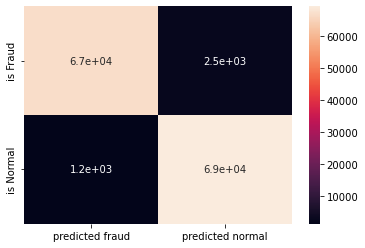

In [27]:
sns.heatmap(confusion, annot=True)